In [96]:
import numpy as np
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import drive
from google.colab import files

In [97]:
"""
!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials
"""

'\n!pip install yfinance\n!pip install yahoofinancials\nimport yfinance as yf\nfrom yahoofinancials import YahooFinancials\n'

!安裝yfinance

匯入yfinance命名為yf

In [98]:
"""
eth_usd=yf.Ticker('ETH-USD')
eth_usd.info
eth_usd = yf.download('ETH-USD', period="max")
eth_usd.to_csv('eth_historical_max.csv')
files.download('eth_historical_max.csv')
"""

'\neth_usd=yf.Ticker(\'ETH-USD\')\neth_usd.info\neth_usd = yf.download(\'ETH-USD\', period="max")\neth_usd.to_csv(\'eth_historical_max.csv\')\nfiles.download(\'eth_historical_max.csv\')\n'

.info查看'ETH-USD的相關詳細資訊

.download下載成.csv

In [99]:
import os
drive.mount('/content/gdrive',force_remount=True)
os.chdir("/content/gdrive/MyDrive/亞洲大學/大三/資料科學")

Mounted at /content/gdrive


In [100]:
!ls -la #顯示該目錄中的所有檔案，用來確認雲端是否掛載成功

total 311936
-rw------- 1 root root     88736 Jan  7 09:50 Binance_ETHUSDT_d.csv
-rw------- 1 root root 317526599 Apr 11  2021 bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv
-rw------- 1 root root    141255 Jan  7 12:44 eth_historical_max.csv
-rw------- 1 root root    102577 Jan  7 11:41 eth_usd.csv
-rw------- 1 root root    172623 Jan  7 12:04 FinalExam_BTC_USD.ipynb
-rw------- 1 root root    241849 Jan 11 08:30 FinalExam_ETH_USD_2019.ipynb
-rw------- 1 root root    354625 Jan 11 17:49 FinalExam_ETH_USD_LinearRegression.ipynb
-rw------- 1 root root     57997 Jan  9 18:29 FinalExam_ETH_USD_RNN2.ipynb
-rw------- 1 root root     42861 Jan 11 17:49 FinalExam_ETH_USD_RNN.ipynb
-rw------- 1 root root     19392 Jan  9 17:53 FinalExam_RNN.ipynb
-rw------- 1 root root    211929 Jan  7 10:40 FinalExam_YFinance_0050.ipynb
-rw------- 1 root root    241986 Jan  7 12:39 FinalExam_YFinance1.ipynb
-rw------- 1 root root    215408 Jan  7 09:53 FinalExam_YFinance2.ipynb
-rw------- 1 root root     

In [101]:
eth=pd.DataFrame()
eth = pd.read_csv('./eth_historical_max.csv')
eth

,Date,Timestamp,Open,High,Low,Close,Adj Close,Volume
0,2017/11/9,1510185600,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017/11/10,1510272000,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017/11/11,1510358400,298.585998,319.453003,298.191986,314.681000,314.681000,842300992
3,2017/11/12,1510444800,314.690002,319.153015,298.513000,307.907989,307.907989,1613479936
4,2017/11/13,1510531200,307.024994,328.415008,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...,...
1516,2022/1/3,1641168000,3829.535645,3836.198730,3698.047607,3761.380371,3761.380371,12080777893
1517,2022/1/4,1641254400,3761.361572,3876.785156,3723.349854,3794.056641,3794.056641,14030925983
1518,2022/1/5,1641340800,3794.269043,3842.059814,3456.745361,3550.386963,3550.386963,18061338502
1519,2022/1/6,1641427200,3549.708984,3549.708984,3335.376709,3418.408203,3418.408203,24293791313


In [102]:
eth.isnull().sum()
#確認有無null值
#.fillna能處理缺失值

Date         0
Timestamp    0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [103]:
eth.shape

(1521, 8)

In [104]:
"""plt.figure(figsize = (12, 7))
plt.title("ETH_USD", size=20)
plt.xlabel("Date", size=10)
plt.ylabel("USD", size=10)
plt.plot(eth["date"],eth["close"], lw=2)"""

'plt.figure(figsize = (12, 7))\nplt.title("ETH_USD", size=20)\nplt.xlabel("Date", size=10)\nplt.ylabel("USD", size=10)\nplt.plot(eth["date"],eth["close"], lw=2)'

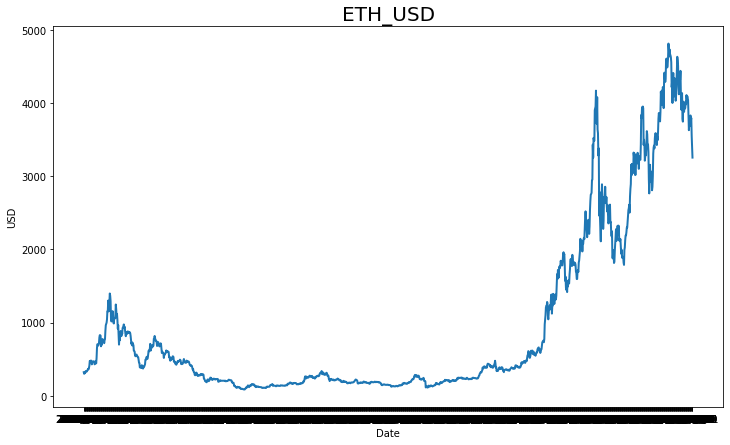

In [105]:
plt.figure(figsize = (12, 7))
plt.title("ETH_USD", size=20)
plt.xlabel("Date", size=10)
plt.ylabel("USD", size=10)
plt.plot(eth["Date"],eth["Adj Close"], lw=2)

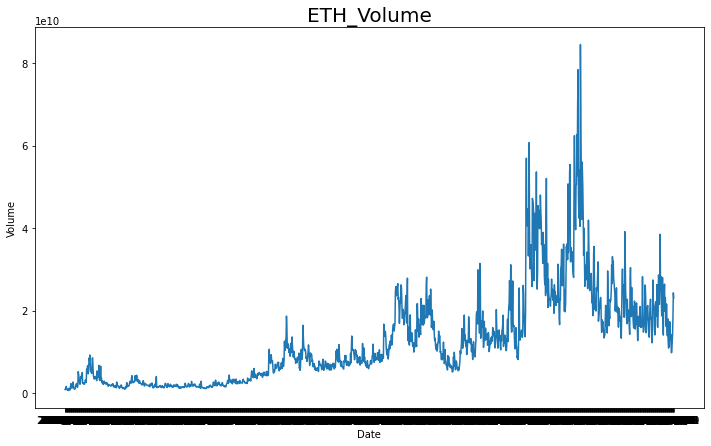

In [106]:
plt.figure(figsize = (12, 7))
plt.title("ETH_Volume", size=20)
plt.xlabel("Date", size=10)
plt.ylabel("Volume", size=10)
plt.plot(eth["Date"],eth["Volume"])

In [107]:
eth_a=eth[:int(np.round(len(eth)*0.7))] #過去
eth_b=eth[len(eth_a):] #現在
eth_a.shape

(1065, 8)

In [108]:
eth_b.shape

(456, 8)

In [109]:
required_features = ['Timestamp','Open', 'High', 'Low', 'Volume']
#'Timestamp','Open', 'High', 'Low', 'Volume'
output_label = 'Adj Close'

特徵線性回歸分析

線性回歸output

In [110]:
x_train, x_test, y_train, y_test = train_test_split(
eth_a[required_features],
eth_a[output_label],
test_size = 0.3
)

隨機切割訓練資料及測試資料，test_size=0.3為train 70%,test 30%

In [111]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [112]:
"""
print(x_test)
print(x_train)
"""

'\nprint(x_test)\nprint(x_train)\n'

In [113]:
model.score(x_test, y_test)

0.9978530225969597

In [114]:
future_set_a = eth_a.shift(periods=0).tail(int(len(eth_a)*0.3))
#取出csv要預測未來['Adj Close']的數據 .tail()尾巴幾筆 period(-1)倒數一天開始
future_set_a

,Date,Timestamp,Open,High,Low,Close,Adj Close,Volume
746,2019/11/25,1574640000,142.697006,150.207962,133.802338,146.476532,146.476532,10962753356
747,2019/11/26,1574726400,146.404312,150.004761,145.216873,148.965073,148.965073,7648516297
748,2019/11/27,1574812800,148.396820,154.887207,143.525604,153.010559,153.010559,8778095308
749,2019/11/28,1574899200,153.069244,156.613586,151.091125,151.717575,151.717575,7346531960
750,2019/11/29,1574985600,151.768600,156.848404,151.460434,155.304153,155.304153,7503898278
...,...,...,...,...,...,...,...,...
1060,2020/10/4,1601769600,346.602234,354.045746,345.131012,352.579010,352.579010,10696959020
1061,2020/10/5,1601856000,352.736816,355.214081,349.679901,353.956787,353.956787,11809507622
1062,2020/10/6,1601942400,353.956482,354.989014,338.003296,340.815857,340.815857,12830796112
1063,2020/10/7,1602028800,340.943085,342.450836,334.545563,341.808655,341.808655,11929918060


In [115]:
prediction_a = model.predict(future_set_a[required_features])

Text(0, 0.5, 'USD')

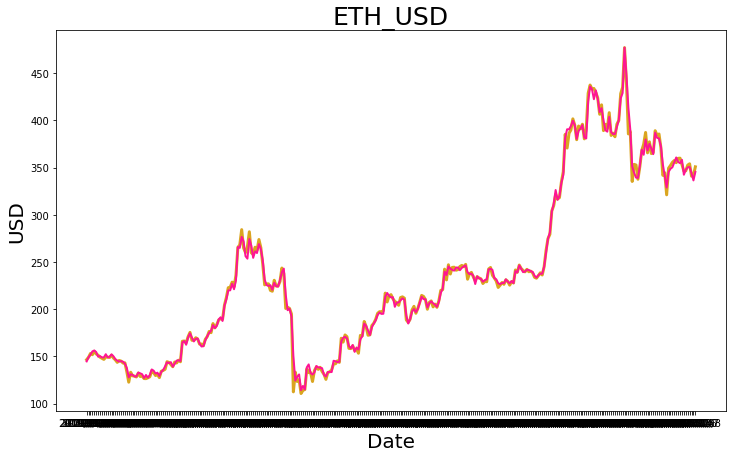

In [116]:
plt.figure(figsize = (12, 7))
plt.plot(eth_a["Date"][746:], eth_a["Adj Close"][746:], color='goldenrod',lw=3) #實際數據
plt.plot(future_set_a["Date"], prediction_a, color='deeppink' ,lw=2) #預測數據
plt.title("ETH_USD", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("USD", size=20)

In [117]:
future_set_b = eth_b.shift(periods=0).tail(int(len(eth_b)))
#取出csv要預測未來['Adj Close']的數據 .tail()尾巴幾筆 period(-1)倒數一天開始
future_set_b

,Date,Timestamp,Open,High,Low,Close,Adj Close,Volume
1065,2020/10/9,1602201600,351.112885,368.310333,348.205841,365.590485,365.590485,13043501763
1066,2020/10/10,1602288000,365.402466,378.267151,365.354034,370.967590,370.967590,13618484324
1067,2020/10/11,1602374400,370.928436,377.246796,369.828033,375.142059,375.142059,12584512533
1068,2020/10/12,1602460800,374.798737,395.122162,366.642334,387.731262,387.731262,15867455424
1069,2020/10/13,1602547200,387.142944,387.375671,375.582458,381.190765,381.190765,14226744838
...,...,...,...,...,...,...,...,...
1516,2022/1/3,1641168000,3829.535645,3836.198730,3698.047607,3761.380371,3761.380371,12080777893
1517,2022/1/4,1641254400,3761.361572,3876.785156,3723.349854,3794.056641,3794.056641,14030925983
1518,2022/1/5,1641340800,3794.269043,3842.059814,3456.745361,3550.386963,3550.386963,18061338502
1519,2022/1/6,1641427200,3549.708984,3549.708984,3335.376709,3418.408203,3418.408203,24293791313


In [118]:
prediction_b = model.predict(future_set_b[required_features])

In [119]:
'''prediction_date_all=np.concatenate([future_set_a["Date"],future_set_b["Date"]])
prediction_all=np.concatenate([prediction_a,prediction_b])
prediction_all'''

'prediction_date_all=np.concatenate([future_set_a["Date"],future_set_b["Date"]])\nprediction_all=np.concatenate([prediction_a,prediction_b])\nprediction_all'

Text(0, 0.5, 'USD')

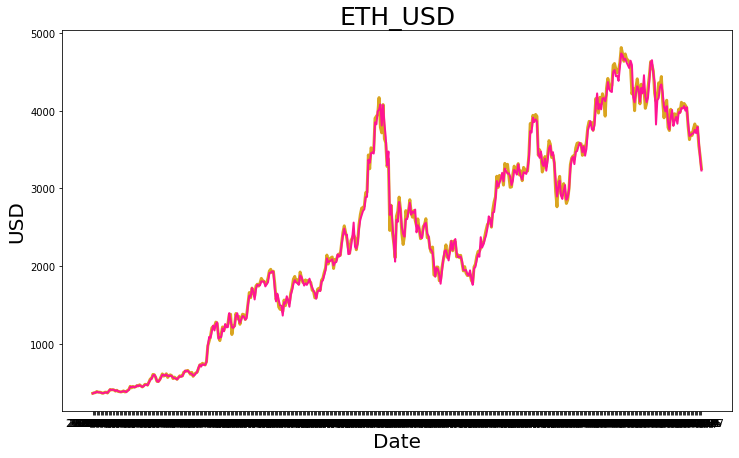

In [120]:
plt.figure(figsize = (12, 7))
plt.plot(eth_b["Date"], eth_b["Adj Close"], color='goldenrod', lw=3)
plt.plot(eth_b["Date"], prediction_b, color='deeppink', lw=2)
plt.title("ETH_USD", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("USD", size=20)

In [128]:
required_features = [ 'Timestamp']
#'Timestamp','Open', 'High', 'Low', 'Volume'
output_label = 'Adj Close'

In [129]:
x_train, x_test, y_train, y_test = train_test_split(
eth_a[required_features],
eth_a[output_label],
test_size = 0.3
)

In [130]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.32625267157452853

In [131]:
future_set_a = eth_a.shift(periods=0).tail(int(len(eth_a)*0.3))
#取出csv要預測未來['Adj Close']的數據 .tail()尾巴幾筆 period(-1)倒數一天開始
future_set_a
prediction_a = model.predict(future_set_a[required_features])

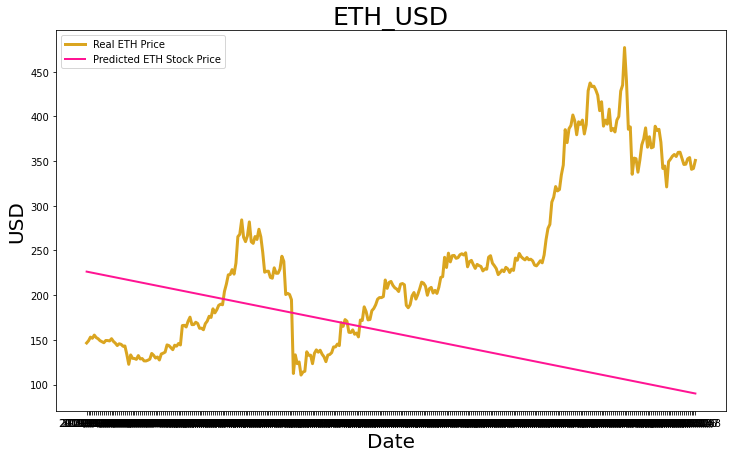

In [132]:
plt.figure(figsize = (12, 7))
plt.plot(eth_a["Date"][746:], eth_a["Adj Close"][746:], color='goldenrod',label = 'Real ETH Price',lw=3) #實際數據
plt.plot(future_set_a["Date"], prediction_a, color='deeppink' ,label = 'Predicted ETH Stock Price',lw=2) #預測數據
plt.title("ETH_USD", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("USD", size=20)
plt.legend()

In [133]:
future_set_b = eth_b.shift(periods=0).tail(int(len(eth_b)))
#取出csv要預測未來['Adj Close']的數據 .tail()尾巴幾筆 period(-1)倒數一天開始
prediction_b = model.predict(future_set_b[required_features])

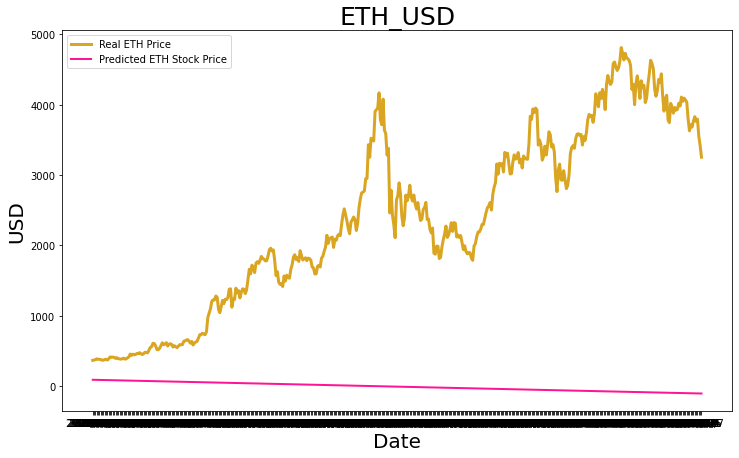

In [134]:
plt.figure(figsize = (12, 7))
plt.plot(eth_b["Date"], eth_b["Adj Close"], color='goldenrod',label = 'Real ETH Price', lw=3)
plt.plot(eth_b["Date"], prediction_b, color='deeppink',label = 'Predicted ETH Stock Price', lw=2)
plt.title("ETH_USD", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("USD", size=20)
plt.legend()